In [1]:
import numpy as np 
import pandas as pd
import os
import sys
import shutil
import subprocess
import csv
from plotnine import *
sys.path.append("..")
sys.path.append("../results")
from numpy import loadtxt
nameSimS = np.array(["DW","SLM","WT","WTD"])
lightLevelS = np.array(["low","medium","high"])

nameSimS, lightLevelS = np.meshgrid(nameSimS,lightLevelS)
nameSimS=nameSimS.flatten()
lightLevelS=lightLevelS.flatten()
main_dir=os.getcwd()+ "/../results"
print(main_dir)

/home/m.giraud/auxin_sizeBuds/CPlantBox/applications/phloem_flow/resultsConsolidated/../results


In [2]:
def loadline(myid, name):
    with open(name, 'r') as fin:
        reader=csv.reader(fin)
        result=[[float(s) for s in row] for i,row in enumerate(reader) if i == myid]
    return np.array(result[0])

In [3]:
def getLength(thread,nameSim,lightLevel):
    directoryN = "/masterI_1701_"+str(nameSim)+"_"+str(lightLevel)+"/"
    results_dir = main_dir +directoryN
    #print(results_dir)
    time = loadtxt(results_dir+'time_'+str(thread)+'.csv',delimiter=",")
    select1 = abs(time - 25 + 10/24)
    idRow = np.where(select1 == min(select1))[0][0] #end select time
    lengthth = loadline(idRow,results_dir+'lengthth_org_'+str(thread)+'.csv')
    #orgot = loadline(idRow,results_dir+'ot_orgsUQ_'+str(thread)+'.csv') 
    orgst = loadline(idRow,results_dir+'st_orgsUQ_'+str(thread)+'.csv') 
    lengthth = lengthth[orgst == 2.]
    nameSimS = np.full(len(lengthth),nameSim)
    lightLevelS = np.full(len(lengthth),lightLevel)
    #threadS = np.full(len(lengthth),thread)
    #results = np.array([lengthth,nameSimS,lightLevelS,threadS])
    nodeId = np.array( [nid +1 for nid,_ in enumerate(lengthth)])
    dataset = pd.DataFrame({'length':lengthth,'nodeId':nodeId,'phenotype':nameSimS,'light':lightLevelS})
    return dataset

In [4]:
df = pd.concat( [getLength(thread,nameliht[0],nameliht[1]) for thread,nameliht in enumerate(zip(nameSimS,lightLevelS))])

In [5]:
df

,length,nodeId,phenotype,light
0,0.050000,1,DW,low
1,0.171993,2,DW,low
2,0.050000,3,DW,low
3,0.050000,4,DW,low
4,0.050000,5,DW,low
...,...,...,...,...
2,3.288679,3,WTD,high
3,12.433663,4,WTD,high
4,9.559380,5,WTD,high
5,24.061325,6,WTD,high


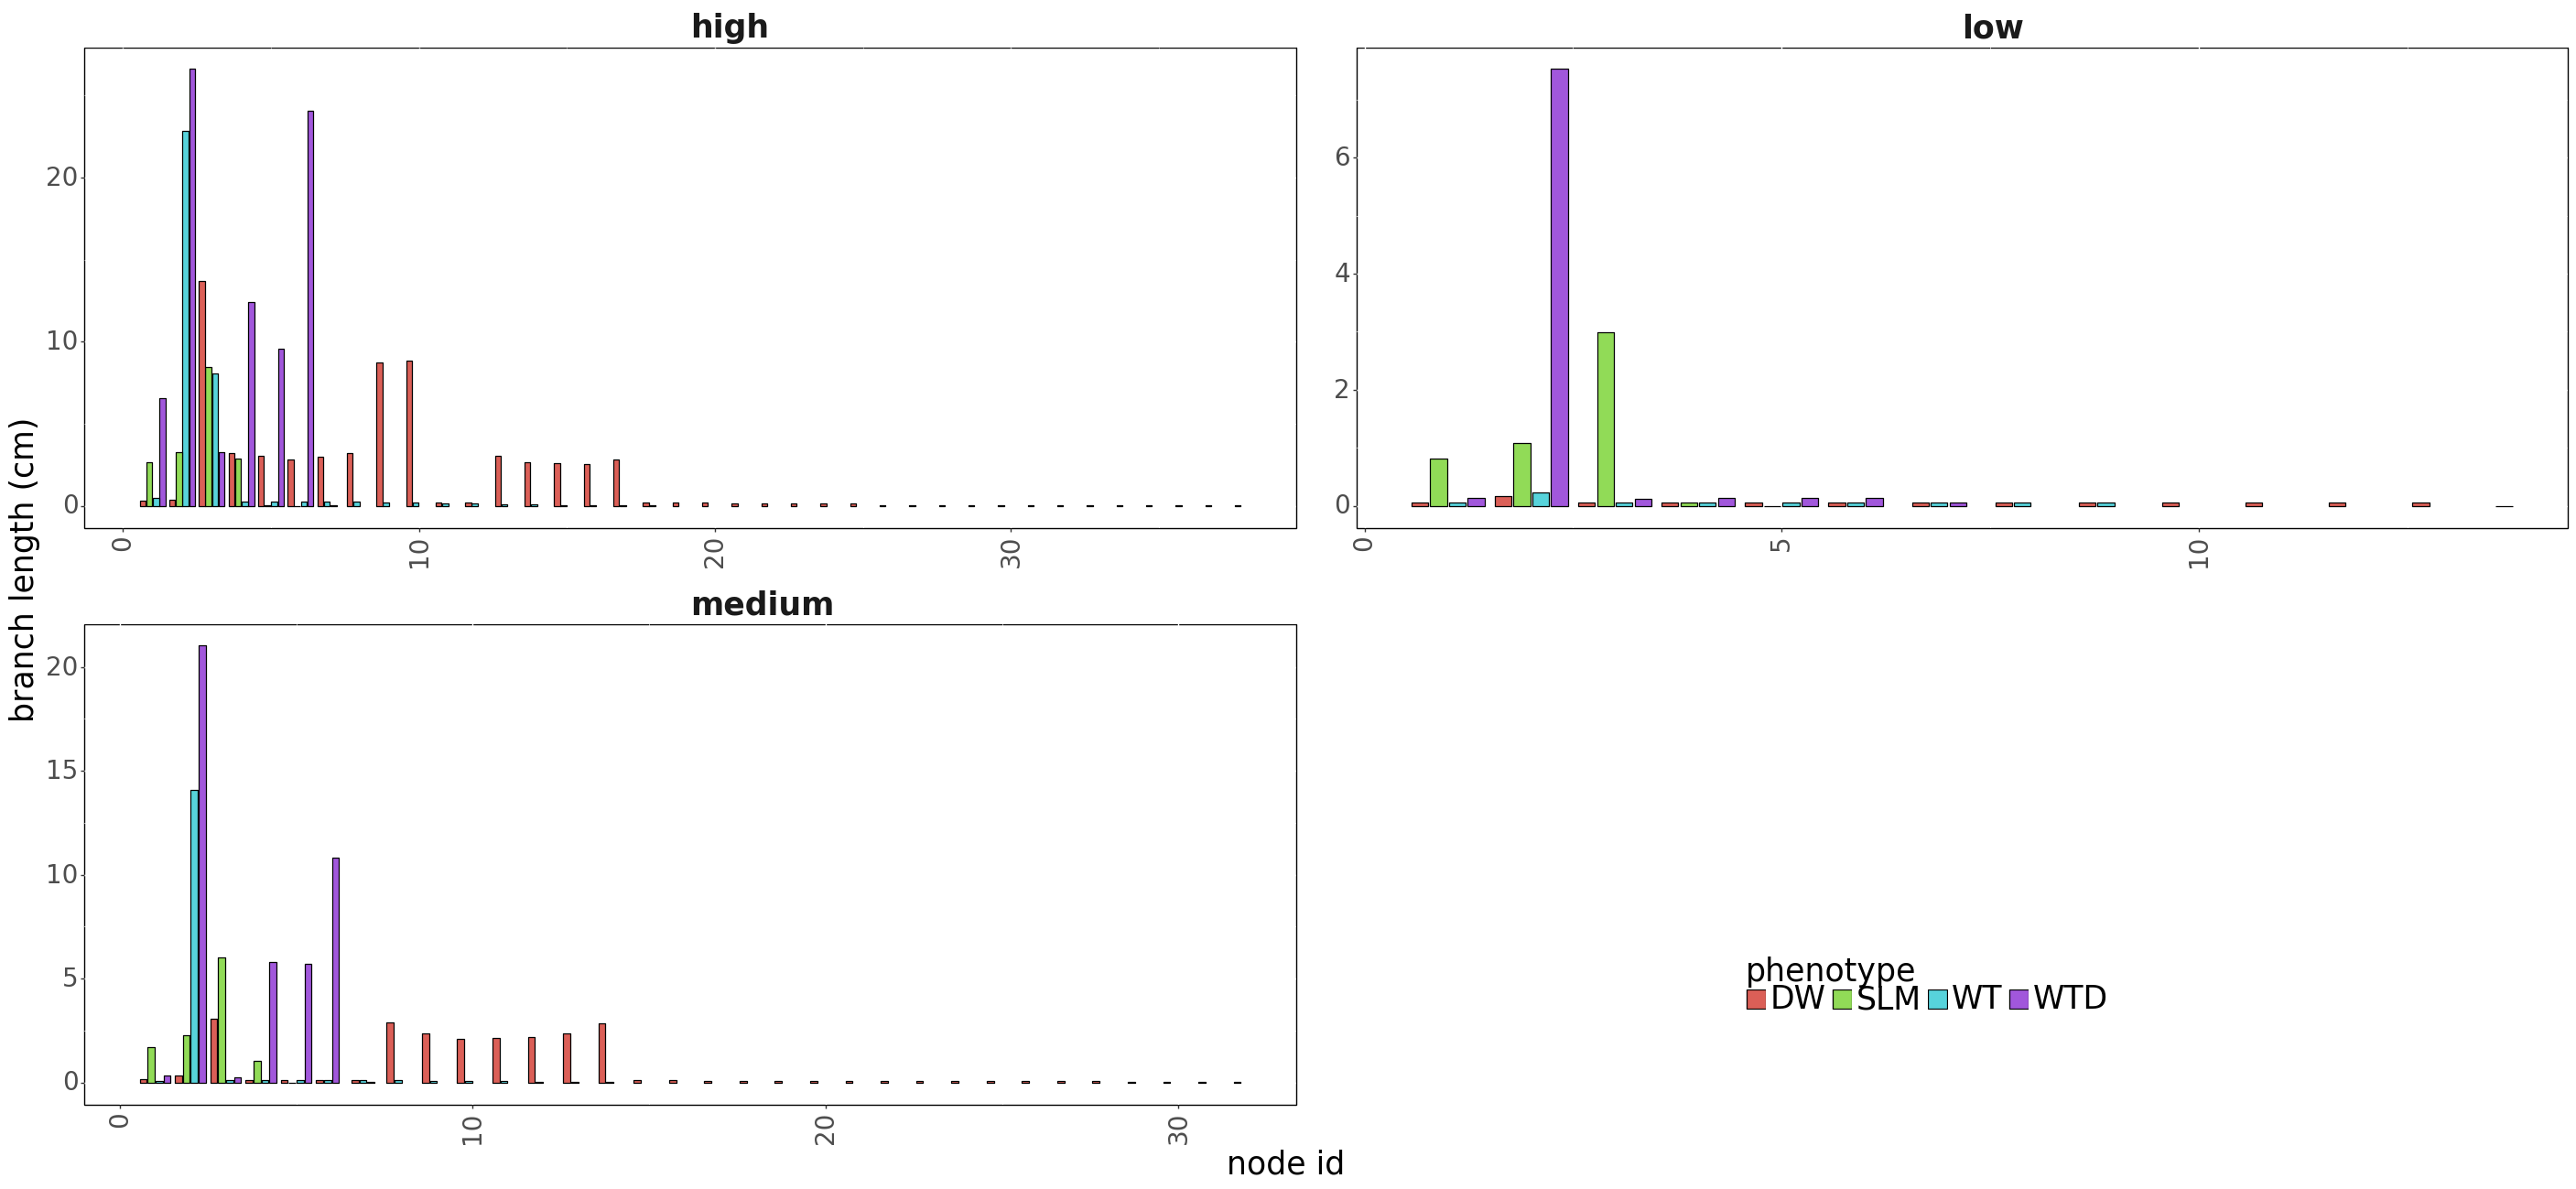

<ggplot: (8764566679944)>

In [20]:
from plotnine import options
options.figure_size = (35, 15)
(
    ggplot(df)  # What data to use
    + aes(x='nodeId', y= "length",  fill="phenotype" )  # What variable to use
    + geom_col(width=0.8,size=0.5, colour="black",position = position_dodge( preserve = "single", width = 0.9))  # Geometric object to use for drawing
    + xlab("node id")
    + facet_wrap("~light", scales = "free", nrow=2, ncol=2)
    + ylab("branch length (cm)")
    
    +theme(subplots_adjust={'wspace': 0.05,'hspace': 0.2},
           legend_text = element_text( size=25),
        legend_title = element_text( size=25),
        panel_border = element_rect(color = "black", fill = "white", size = 1), 
        legend_position= [0.7,0.2],
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=25) ,
        axis_text_x =element_text(angle = 90, size=20) ,
        axis_text = element_text( size=20),
        axis_title = element_text( size=25),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 25, hjust = 0,face ="bold")) 
)

In [21]:
df.to_csv('outSimulation.csv',index=False)

In [22]:
os.getcwd()


'/home/m.giraud/auxin_sizeBuds/CPlantBox/applications/phloem_flow/resultsConsolidated'